# Introduction
This Notebook will discuss the methodology of choosing the features that affect whether an employee stays in the company or not.

# Importing libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading and checking dataset

In [87]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [89]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [90]:
df["Tenure"].agg([min, max])

min     0
max    10
Name: Tenure, dtype: int64

We can see the following:
- Our data have 10000 rows and 14 columns
- We don't have any NULL values.
- Employees are only from 3 different countries
- There is a big variety of ages
- No employee has more than 4 products
- No employee stayed in the company for more than 10 years

# Percentage of exited employees

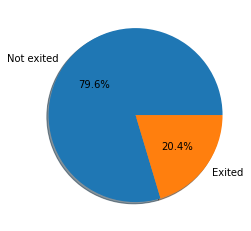

In [91]:
fig, ax = plt.subplots()

ax.pie(df["Exited"].value_counts(), labels = ["Not exited", "Exited"], autopct = '%1.1f%%', shadow = True)
plt.show()

# Feature Engineering
- It is clear that the first three coloumns (RowNumbe, CustomerID, Surname) don't have any affect on whether the employee will exit or not

In [92]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

### Visualizing categorical data

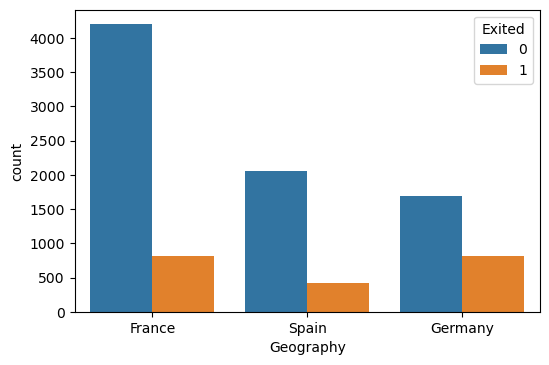

In [93]:
fig, ax = plt.subplots(dpi = 100)

sns.countplot('Geography', hue = 'Exited', data = df)

plt.show()

- It is clear that the percentage that leave from france is bigger than any other </br>
###### Lets make this even more clear:

In [94]:
values = df.groupby("Geography")["Exited"].value_counts()["France"]
values

Exited
0    4204
1     810
Name: Exited, dtype: int64

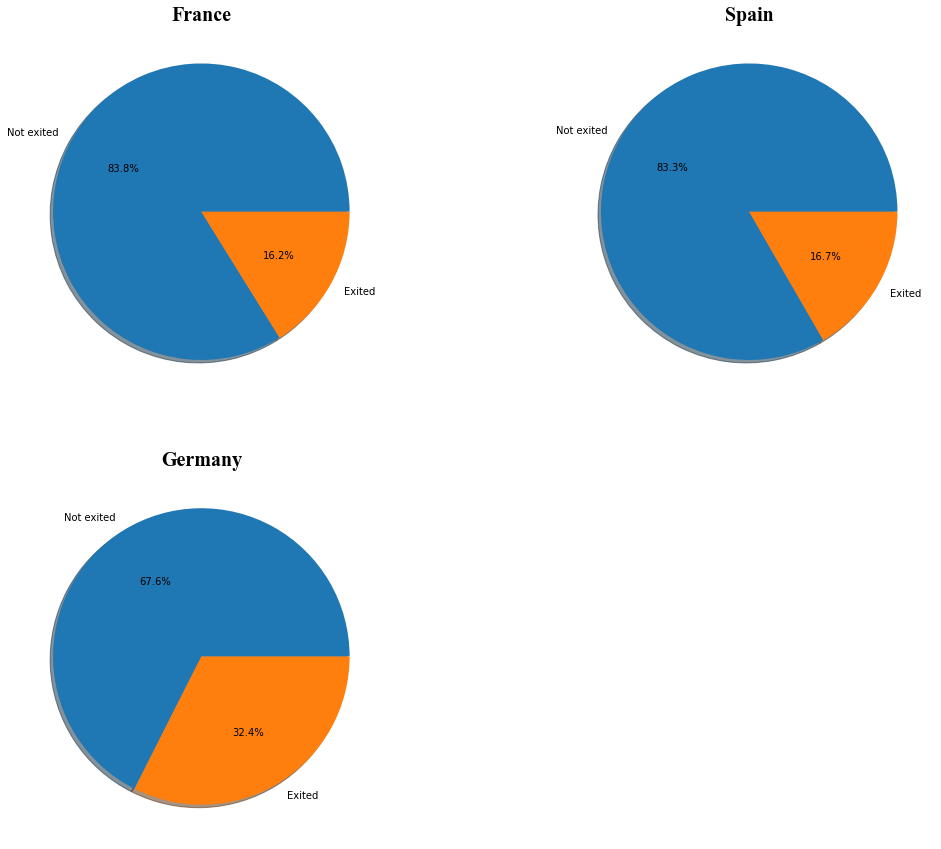

In [95]:
values_france = df.set_index("Geography")["Exited"]["France"].value_counts()
values_spain = df.set_index("Geography")["Exited"]["Spain"].value_counts()
values_germany = df.set_index("Geography")["Exited"]["Germany"].value_counts()

fig, ax = plt.subplots(2, 2, figsize = (18, 15))

ax[0][0].pie(values_france, labels = ["Not exited", "Exited"], autopct = '%1.1f%%', shadow = True)
ax[0][0].set_title('France', fontname="Times New Roman", size=20, fontweight="bold")

ax[0][1].pie(values_spain, labels = ["Not exited", "Exited"], autopct = '%1.1f%%', shadow = True)
ax[0][1].set_title('Spain', fontname="Times New Roman", size=20, fontweight="bold")

ax[1][0].pie(values_germany, labels = ["Not exited", "Exited"], autopct = '%1.1f%%', shadow = True)
ax[1][0].set_title('Germany', fontname="Times New Roman", size=20, fontweight="bold")

ax[1][1].remove()

plt.show()

- Now it is even more clear That German employees have higher percentage of exiting

###### Gender Percentage

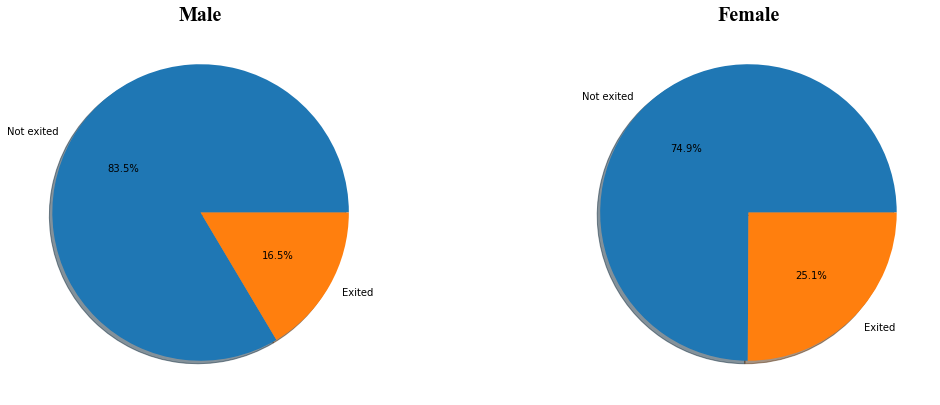

In [96]:
values_male = df.set_index("Gender")["Exited"]["Male"].value_counts()
values_female = df.set_index("Gender")["Exited"]["Female"].value_counts()

fig, ax = plt.subplots(2, 2, figsize = (18, 15))

ax[0][0].pie(values_male, labels = ["Not exited", "Exited"], autopct = '%1.1f%%', shadow = True)
ax[0][0].set_title("Male", fontname="Times New Roman", size=20, fontweight="bold")

ax[0][1].pie(values_female, labels = ["Not exited", "Exited"], autopct = '%1.1f%%', shadow = True)
ax[0][1].set_title("Female", fontname="Times New Roman", size=20, fontweight="bold")

ax[1][0].remove(), ax[1][1].remove()

plt.show()

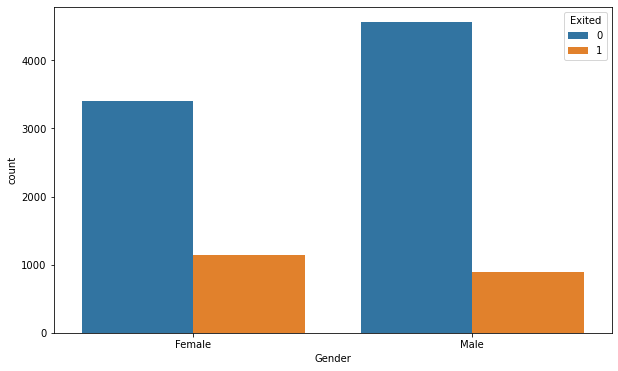

In [97]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.countplot('Gender', hue = 'Exited', data = df)

plt.show()

- Although the Number of males are larger than females but females are more likely to exit 

###### Tenure

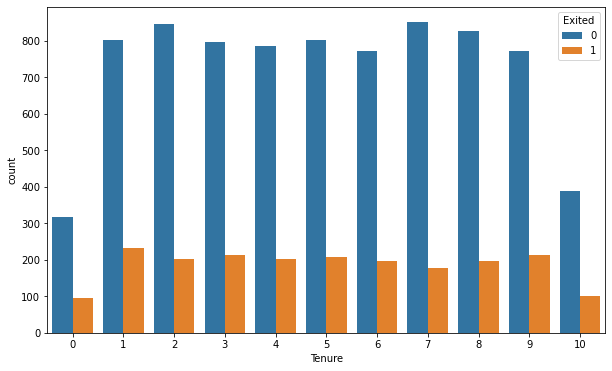

In [98]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.countplot('Tenure', hue = 'Exited', data = df)

plt.show()

<AxesSubplot:xlabel='Tenure'>

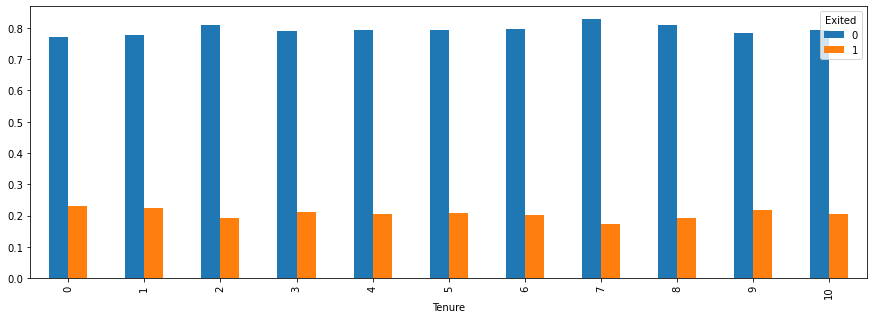

In [99]:
df.groupby('Tenure')['Exited'].value_counts(normalize=True).unstack().plot(kind='bar',figsize=[15,5])

- Most customers stay between 1 and 9 years
- Also the percentage of churning is high in this region 

###### Number of products

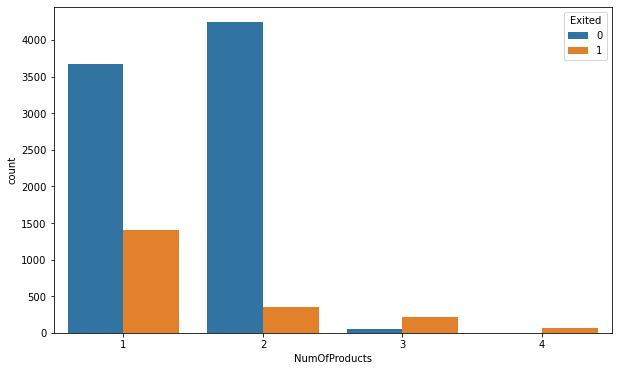

In [100]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.countplot('NumOfProducts', hue = 'Exited', data = df)

plt.show()

- Most customers have one or two products, while those who churned have more than two products.

###### But lets see the percentage to be more certain

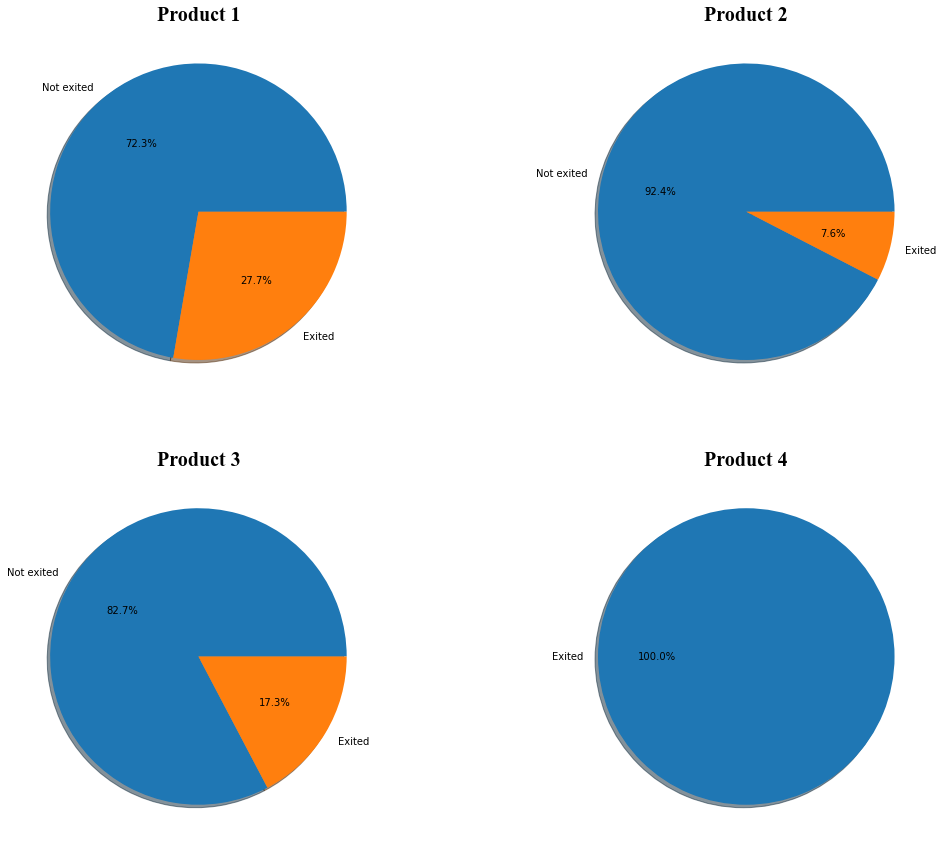

In [101]:
values1 = df.set_index("NumOfProducts")["Exited"][1].value_counts()
values2 = df.set_index("NumOfProducts")["Exited"][2].value_counts()
values3 = df.set_index("NumOfProducts")["Exited"][3].value_counts()
values4 = df.set_index("NumOfProducts")["Exited"][4].value_counts()

fig, ax = plt.subplots(2, 2, figsize = (18, 15))

ax[0][0].pie(values1, labels = ["Not exited", "Exited"], autopct = '%1.1f%%', shadow = True)
ax[0][0].set_title("Product 1", fontname="Times New Roman", size=20, fontweight="bold")

ax[0][1].pie(values2, labels = ["Not exited", "Exited"], autopct = '%1.1f%%', shadow = True)
ax[0][1].set_title("Product 2", fontname="Times New Roman", size=20, fontweight="bold")

ax[1][0].pie(values3, labels = ["Not exited", "Exited"], autopct = '%1.1f%%', shadow = True)
ax[1][0].set_title("Product 3", fontname="Times New Roman", size=20, fontweight="bold")

ax[1][1].pie(values4, labels = ["Exited"], autopct = '%1.1f%%', shadow = True)
ax[1][1].set_title("Product 4", fontname="Times New Roman", size=20, fontweight="bold")

plt.show()

- All those who have four products have churned
- Those who have one product are more likely to churn

###### Has credit card

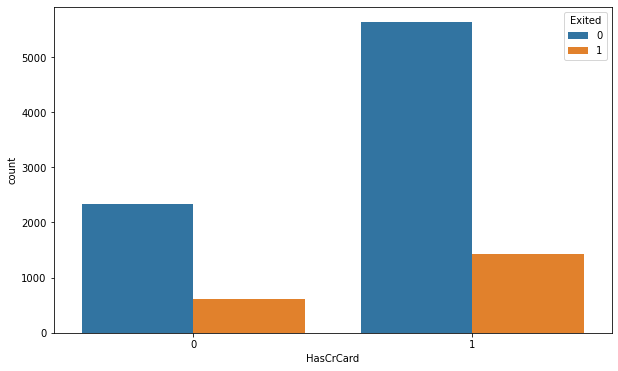

In [102]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.countplot('HasCrCard', hue = 'Exited', data = df)

plt.show()

- It is not really clear which percentage of higher

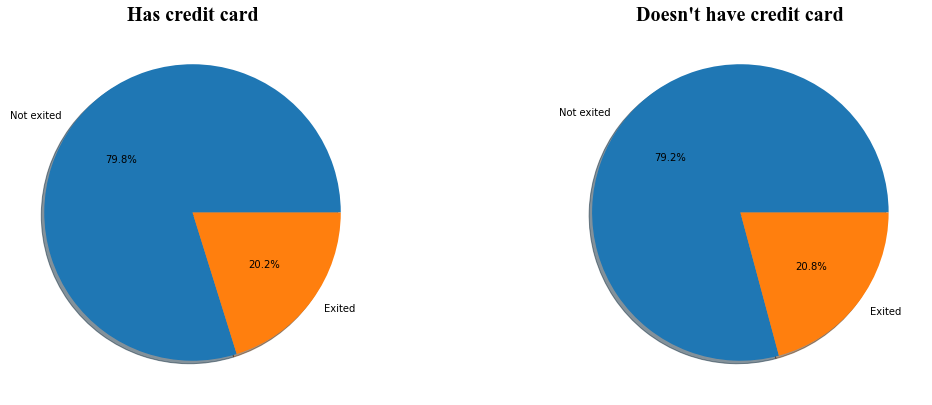

In [103]:
values_with_cr = df.set_index("HasCrCard")["Exited"][1].value_counts()
values_without_cr = df.set_index("HasCrCard")["Exited"][0].value_counts()

fig, ax = plt.subplots(2, 2, figsize = (18, 15))

ax[0][0].pie(values_with_cr, labels = ["Not exited", "Exited"], autopct = '%1.1f%%', shadow = True)
ax[0][0].set_title("Has credit card", fontname="Times New Roman", size=20, fontweight="bold")

ax[0][1].pie(values_without_cr, labels = ["Not exited", "Exited"], autopct = '%1.1f%%', shadow = True)
ax[0][1].set_title("Doesn't have credit card", fontname="Times New Roman", size=20, fontweight="bold")

ax[1][0].remove(), ax[1][1].remove()

plt.show()

- The percentage is really close to each other
- We can say that credit card doesn't have any effect on churning

###### Active members

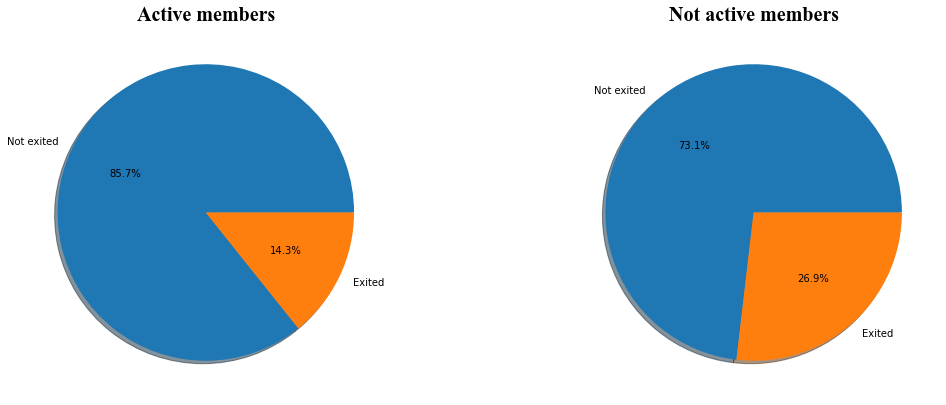

In [104]:
values_active = df.set_index("IsActiveMember")["Exited"][1].value_counts()
values_not_active = df.set_index("IsActiveMember")["Exited"][0].value_counts()

fig, ax = plt.subplots(2, 2, figsize = (18, 15))

ax[0][0].pie(values_active, labels = ["Not exited", "Exited"], autopct = '%1.1f%%', shadow = True)
ax[0][0].set_title("Active members", fontname="Times New Roman", size=20, fontweight="bold")

ax[0][1].pie(values_not_active, labels = ["Not exited", "Exited"], autopct = '%1.1f%%', shadow = True)
ax[0][1].set_title("Not active members", fontname="Times New Roman", size=20, fontweight="bold")

ax[1][0].remove(), ax[1][1].remove()

plt.show()

- This was expected. Those who are not active are more likely to exit

## Not categorical data

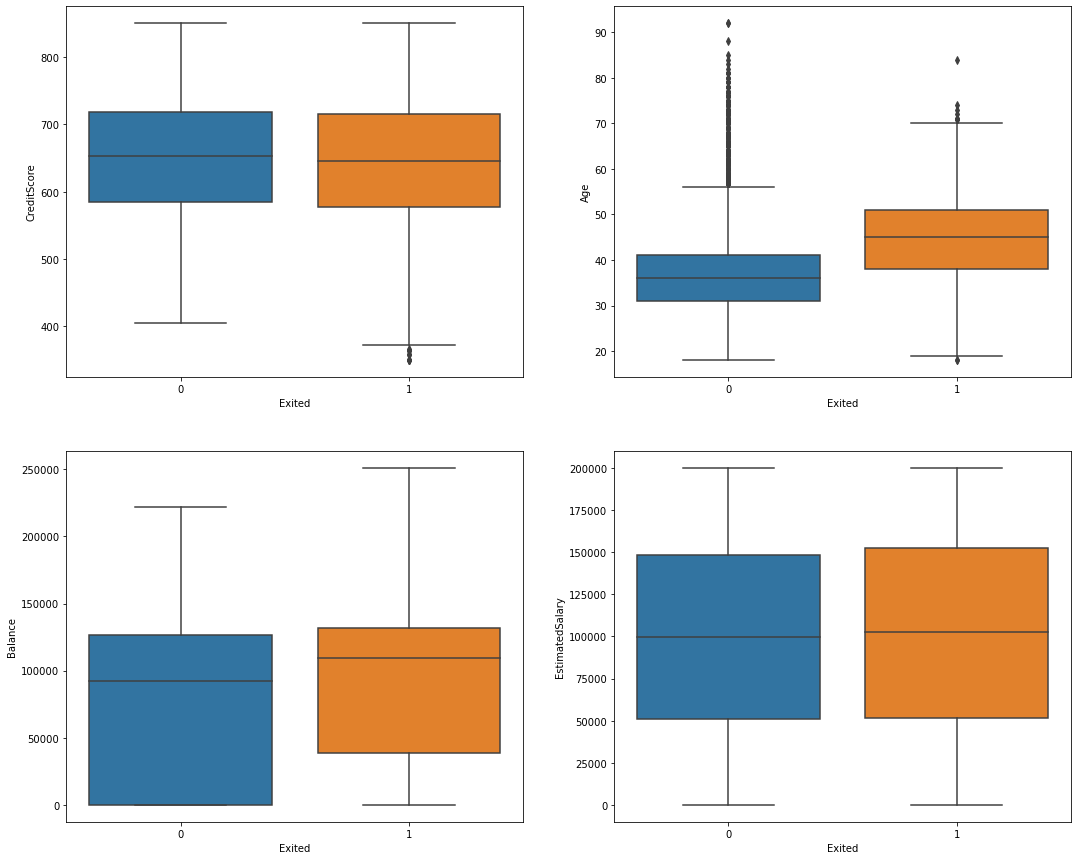

In [105]:
fig, ax = plt.subplots(2, 2, figsize = (18, 15))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.show()

- It is clear that credit score has no significant effect
- Older customer are mre likely to churn than young customers
- Many users with high bank balance are churning
- Estimated salary has no significant effect

## Seeing correlation heatmap

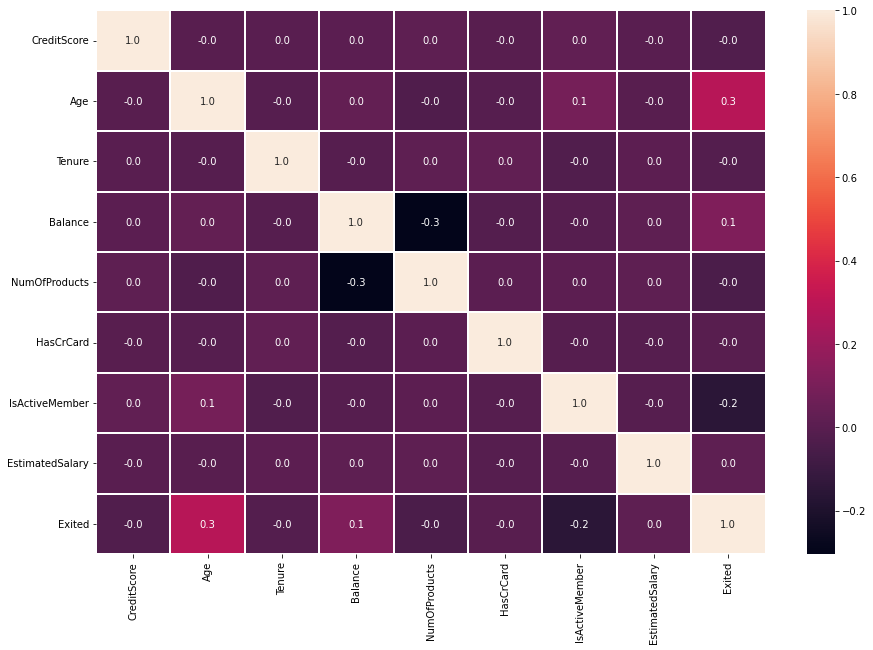

In [257]:
plt.figure(figsize = (15, 10))

corr = df.corr()

sns.heatmap(corr, annot = True, linewidth=0.1, fmt="0.1f")
plt.show()

- There are no two features which are highly correlated
- We can clearly see that the heat map validates our previous conclusions

# Data preprocessing

In [106]:
# Turning categorical data into no categorical data
df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [107]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.0,1,1,1,101348.88,1


In [209]:
from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)

In [210]:
#Standarization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [211]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

# Modeling

##### Importing libraries

In [212]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

##### Creating ANN

In [249]:
model = Sequential()

model.add(Dense(6, activation = 'relu', input_shape = (10, )))

#Normalization of weights
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())


model.add(Dense(2, activation = 'sigmoid'))

##### Compiling and fitting model

In [250]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

fitted_model = model.fit(x_train, y_train, validation_split = 0.20, validation_data = (x_test, y_test), batch_size = 35, epochs = 100)

Epoch 1/100
183/183 [==============================] - 1s 3ms/step - loss: 0.7646 - accuracy: 0.5803 - val_loss: 0.6352 - val_accuracy: 0.6762
Epoch 2/100
183/183 [==============================] - 0s 3ms/step - loss: 0.6087 - accuracy: 0.7180 - val_loss: 0.5855 - val_accuracy: 0.7731
Epoch 3/100
183/183 [==============================] - 0s 3ms/step - loss: 0.5493 - accuracy: 0.7767 - val_loss: 0.5250 - val_accuracy: 0.7925
Epoch 4/100
183/183 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.7894 - val_loss: 0.5033 - val_accuracy: 0.7994
Epoch 5/100
183/183 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.7917 - val_loss: 0.4976 - val_accuracy: 0.7994
Epoch 6/100
183/183 [==============================] - 0s 2ms/step - loss: 0.5147 - accuracy: 0.7922 - val_loss: 0.4960 - val_accuracy: 0.7994
Epoch 7/100
183/183 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7920 - val_loss: 0.4955 - val_accuracy: 0.7994

Epoch 58/100
183/183 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7922 - val_loss: 0.4944 - val_accuracy: 0.7994
Epoch 59/100
183/183 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.7922 - val_loss: 0.4942 - val_accuracy: 0.7994
Epoch 60/100
183/183 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7922 - val_loss: 0.4941 - val_accuracy: 0.7994
Epoch 61/100
183/183 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7922 - val_loss: 0.4941 - val_accuracy: 0.7994
Epoch 62/100
183/183 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.7922 - val_loss: 0.4939 - val_accuracy: 0.7994
Epoch 63/100
183/183 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7922 - val_loss: 0.4937 - val_accuracy: 0.7994
Epoch 64/100
183/183 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7922 - val_loss: 0.4943 - val_accuracy:

# Evaluating

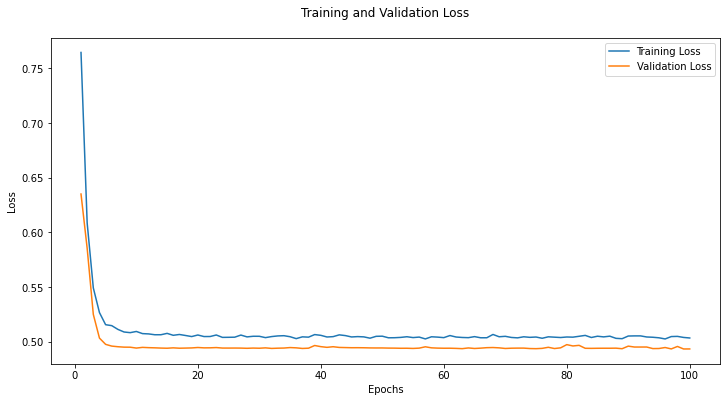

In [251]:
plt.figure(figsize = (12, 6))

train_loss = fitted_model.history['loss']
val_loss = fitted_model.history['val_loss'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

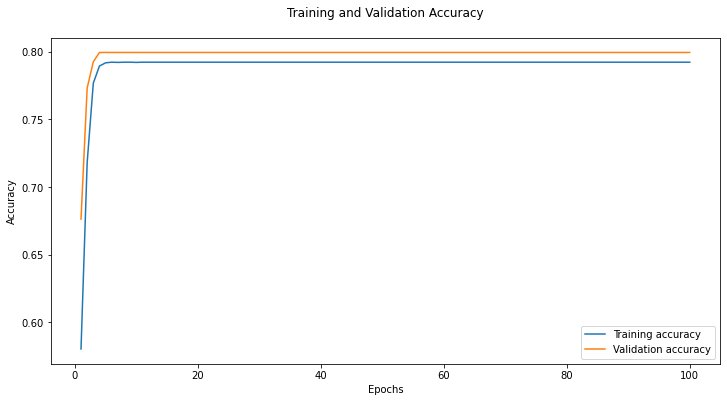

In [252]:
plt.figure(figsize = (12, 6))

train_loss = fitted_model.history['accuracy']
val_loss = fitted_model.history['val_accuracy'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [253]:
acc = model.evaluate(x_test, y_test)[1]

print("Accuracy of model =", acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.8070
Accuracy of model = 0.8069999814033508


# Model summary
- 5 layers used:
    - Input layer
    - Dense hidden layer
    - Dropout layer
    - Batch Normalization layer
    - Output layer

In [255]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 6)                 66        
                                                                 
 dropout_51 (Dropout)        (None, 6)                 0         
                                                                 
 batch_normalization_59 (Bat  (None, 6)                24        
 chNormalization)                                                
                                                                 
 dense_107 (Dense)           (None, 2)                 14        
                                                                 
Total params: 104
Trainable params: 92
Non-trainable params: 12
_________________________________________________________________
